In [38]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('train-2.csv')
df.head()

,Statement,Label
0,Says the Annies List political group supports ...,False
1,When did the decline of coal start? It started...,True
2,"Hillary Clinton agrees with John McCain ""by vo...",True
3,Health care reform legislation is likely to ma...,False
4,The economic turnaround started at the end of ...,True


In [39]:
df.isnull().sum()

Statement    0
Label        0
dtype: int64

In [40]:
len(df)

10240

In [41]:
# one hot encoding for lable 
df['Label']= pd.get_dummies(df['Label'])
df.head()

,Statement,Label
0,Says the Annies List political group supports ...,1
1,When did the decline of coal start? It started...,0
2,"Hillary Clinton agrees with John McCain ""by vo...",0
3,Health care reform legislation is likely to ma...,1
4,The economic turnaround started at the end of ...,0


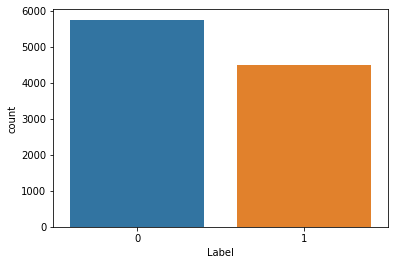

In [42]:
# ballanced data or unballanced data
sns.countplot(data = df, x = 'Label')

In [43]:
df.shape

(10240, 2)

In [44]:
# removing the punchuvation.
pd.get_option('display.max_colwidth',100)
df = pd.read_csv('train-2.csv') 
df.head(10)

,Statement,Label
0,Says the Annies List political group supports ...,False
1,When did the decline of coal start? It started...,True
2,"Hillary Clinton agrees with John McCain ""by vo...",True
3,Health care reform legislation is likely to ma...,False
4,The economic turnaround started at the end of ...,True
5,The Chicago Bears have had more starting quart...,True
6,Jim Dunnam has not lived in the district he re...,False
7,I'm the only person on this stage who has work...,True
8,"However, it took $19.5 million in Oregon Lotte...",True
9,Says GOP primary opponents Glenn Grothman and ...,True


In [45]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [46]:
def remove_punchuvation(text):
    ext_nopunch = ''.join([c for c in text if c not in string.punctuation])
    return ext_nopunch

In [47]:
df['clean'] = df['Statement'].apply(lambda x: remove_punchuvation(x)) 

In [48]:
df.head()

,Statement,Label,clean
0,Says the Annies List political group supports ...,False,Says the Annies List political group supports ...
1,When did the decline of coal start? It started...,True,When did the decline of coal start It started ...
2,"Hillary Clinton agrees with John McCain ""by vo...",True,Hillary Clinton agrees with John McCain by vot...
3,Health care reform legislation is likely to ma...,False,Health care reform legislation is likely to ma...
4,The economic turnaround started at the end of ...,True,The economic turnaround started at the end of ...


In [49]:
# Tokenization...
import re

def tokenize(txt):
    tokens = re.split('\W+',txt)
    return tokens
df['clean_tok'] = df['clean'].apply(lambda x: tokenize(x.lower()))
df.head()

,Statement,Label,clean,clean_tok
0,Says the Annies List political group supports ...,False,Says the Annies List political group supports ...,"[says, the, annies, list, political, group, su..."
1,When did the decline of coal start? It started...,True,When did the decline of coal start It started ...,"[when, did, the, decline, of, coal, start, it,..."
2,"Hillary Clinton agrees with John McCain ""by vo...",True,Hillary Clinton agrees with John McCain by vot...,"[hillary, clinton, agrees, with, john, mccain,..."
3,Health care reform legislation is likely to ma...,False,Health care reform legislation is likely to ma...,"[health, care, reform, legislation, is, likely..."
4,The economic turnaround started at the end of ...,True,The economic turnaround started at the end of ...,"[the, economic, turnaround, started, at, the, ..."


In [50]:
import nltk
stopwords = nltk.corpus.stopwords.words('english')
stopwords[1:10]

['me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [51]:
# remove the stopwords....
def removestopword(text_tok):
    text_clean = [word for word in text_tok if word not in stopwords]
    return text_clean

df['cleaned_stop'] = df['clean_tok'].apply(lambda x: removestopword(x))
    

In [52]:
df.head()

,Statement,Label,clean,clean_tok,cleaned_stop
0,Says the Annies List political group supports ...,False,Says the Annies List political group supports ...,"[says, the, annies, list, political, group, su...","[says, annies, list, political, group, support..."
1,When did the decline of coal start? It started...,True,When did the decline of coal start It started ...,"[when, did, the, decline, of, coal, start, it,...","[decline, coal, start, started, natural, gas, ..."
2,"Hillary Clinton agrees with John McCain ""by vo...",True,Hillary Clinton agrees with John McCain by vot...,"[hillary, clinton, agrees, with, john, mccain,...","[hillary, clinton, agrees, john, mccain, votin..."
3,Health care reform legislation is likely to ma...,False,Health care reform legislation is likely to ma...,"[health, care, reform, legislation, is, likely...","[health, care, reform, legislation, likely, ma..."
4,The economic turnaround started at the end of ...,True,The economic turnaround started at the end of ...,"[the, economic, turnaround, started, at, the, ...","[economic, turnaround, started, end, term]"


In [53]:
# stemming 
import nltk
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [54]:
def stemming(teknize_text):
    text = [ps.stem(word) for word in teknize_text]
    return text


In [55]:
df['stem'] = df['cleaned_stop'].apply(lambda x: stemming(x))
df.head()

,Statement,Label,clean,clean_tok,cleaned_stop,stem
0,Says the Annies List political group supports ...,False,Says the Annies List political group supports ...,"[says, the, annies, list, political, group, su...","[says, annies, list, political, group, support...","[say, anni, list, polit, group, support, third..."
1,When did the decline of coal start? It started...,True,When did the decline of coal start It started ...,"[when, did, the, decline, of, coal, start, it,...","[decline, coal, start, started, natural, gas, ...","[declin, coal, start, start, natur, ga, took, ..."
2,"Hillary Clinton agrees with John McCain ""by vo...",True,Hillary Clinton agrees with John McCain by vot...,"[hillary, clinton, agrees, with, john, mccain,...","[hillary, clinton, agrees, john, mccain, votin...","[hillari, clinton, agre, john, mccain, vote, g..."
3,Health care reform legislation is likely to ma...,False,Health care reform legislation is likely to ma...,"[health, care, reform, legislation, is, likely...","[health, care, reform, legislation, likely, ma...","[health, care, reform, legisl, like, mandat, f..."
4,The economic turnaround started at the end of ...,True,The economic turnaround started at the end of ...,"[the, economic, turnaround, started, at, the, ...","[economic, turnaround, started, end, term]","[econom, turnaround, start, end, term]"


In [56]:
# lemmatization 
import nltk
wl = nltk.WordNetLemmatizer()


In [57]:
def lemma(teknize_text):
    text = [wl.lemmatize(word) for word in teknize_text]
    return text

In [58]:
df['lemma'] = df['cleaned_stop'].apply(lambda x: stemming(x))
df.head()

,Statement,Label,clean,clean_tok,cleaned_stop,stem,lemma
0,Says the Annies List political group supports ...,False,Says the Annies List political group supports ...,"[says, the, annies, list, political, group, su...","[says, annies, list, political, group, support...","[say, anni, list, polit, group, support, third...","[say, anni, list, polit, group, support, third..."
1,When did the decline of coal start? It started...,True,When did the decline of coal start It started ...,"[when, did, the, decline, of, coal, start, it,...","[decline, coal, start, started, natural, gas, ...","[declin, coal, start, start, natur, ga, took, ...","[declin, coal, start, start, natur, ga, took, ..."
2,"Hillary Clinton agrees with John McCain ""by vo...",True,Hillary Clinton agrees with John McCain by vot...,"[hillary, clinton, agrees, with, john, mccain,...","[hillary, clinton, agrees, john, mccain, votin...","[hillari, clinton, agre, john, mccain, vote, g...","[hillari, clinton, agre, john, mccain, vote, g..."
3,Health care reform legislation is likely to ma...,False,Health care reform legislation is likely to ma...,"[health, care, reform, legislation, is, likely...","[health, care, reform, legislation, likely, ma...","[health, care, reform, legisl, like, mandat, f...","[health, care, reform, legisl, like, mandat, f..."
4,The economic turnaround started at the end of ...,True,The economic turnaround started at the end of ...,"[the, economic, turnaround, started, at, the, ...","[economic, turnaround, started, end, term]","[econom, turnaround, start, end, term]","[econom, turnaround, start, end, term]"


In [59]:
# one hot encoding for lable 
df['Label']= pd.get_dummies(df['Label'])
df.head()

,Statement,Label,clean,clean_tok,cleaned_stop,stem,lemma
0,Says the Annies List political group supports ...,1,Says the Annies List political group supports ...,"[says, the, annies, list, political, group, su...","[says, annies, list, political, group, support...","[say, anni, list, polit, group, support, third...","[say, anni, list, polit, group, support, third..."
1,When did the decline of coal start? It started...,0,When did the decline of coal start It started ...,"[when, did, the, decline, of, coal, start, it,...","[decline, coal, start, started, natural, gas, ...","[declin, coal, start, start, natur, ga, took, ...","[declin, coal, start, start, natur, ga, took, ..."
2,"Hillary Clinton agrees with John McCain ""by vo...",0,Hillary Clinton agrees with John McCain by vot...,"[hillary, clinton, agrees, with, john, mccain,...","[hillary, clinton, agrees, john, mccain, votin...","[hillari, clinton, agre, john, mccain, vote, g...","[hillari, clinton, agre, john, mccain, vote, g..."
3,Health care reform legislation is likely to ma...,1,Health care reform legislation is likely to ma...,"[health, care, reform, legislation, is, likely...","[health, care, reform, legislation, likely, ma...","[health, care, reform, legisl, like, mandat, f...","[health, care, reform, legisl, like, mandat, f..."
4,The economic turnaround started at the end of ...,0,The economic turnaround started at the end of ...,"[the, economic, turnaround, started, at, the, ...","[economic, turnaround, started, end, term]","[econom, turnaround, start, end, term]","[econom, turnaround, start, end, term]"


In [75]:
#Data cleaning and preprocessing
import re
import nltk

from nltk.corpus import stopwords
wl = nltk.WordNetLemmatizer()
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['Statement'][i])
    review = review.lower()
    review = review.split()
    
    review = [wl.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
    

In [77]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x = cv.fit_transform(corpus).toarray()
y = df['Label']

In [79]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20)

In [86]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
model = lg.fit(x_train,y_train)
pred = model.predict(x_train)
len(pred)

/Users/Basha/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


8192

In [90]:
model.score(x_train,y_train)

0.869384765625

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
X = tf.fit_transform(corpus).toarray()
y = df['Label']

In [117]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.20)

In [118]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
model = lg.fit(x_train,y_train)
pred = model.predict(x_train)
len(pred)

/Users/Basha/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


8192

In [119]:
model.score(x_train,y_train)

0.79150390625